In [1]:
!pip install bnlp_toolkit
!pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=88862667d9a1a44eca345de99a50c3d1402f0675423cea656c91bc5fb1bb4ce1
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
  Created wheel for gensim: filename=gensim-4.0.1-cp39-cp39-linux_x86_64.whl size=26057819 sha256=a653cf0f0d26c9bf1b7eecf42c372bd3191ea2e528e4eb2362932758afd318ad


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read Dataset
comments = pd.read_csv('/content/drive/MyDrive/Thesis Ecommerce/dataset_ml.csv', encoding='UTF-8')

In [5]:
comments.head()

,Comments,Labels
0,ব্লুটুথ দিসে কিন্তু পিন দে নাই,Bad_Reviews
1,অর্ডার দিতে পাচ্ছি না! একটু দেখবেন!,Bad_Reviews
2,ফোনের সাথে পানির বোতল ফ্রি দেওয়ার কথা ছিলো কিন...,Bad_Reviews
3,"ফালতু একটা ফোন অতিরিক্ত গরম হয়, ফোনে বেশি চার...",Bad_Reviews
4,আমি এই ড্রেসটা ওডার করছিলাম কিন্তু\nআমাকে এটা ...,Bad_Reviews


In [6]:
comments['Labels'].unique()

array(['Bad_Reviews', 'Questions', 'Positive_Review'], dtype=object)

In [7]:
comments.shape

(11978, 2)

In [8]:
comments.isnull().any()

Comments     True
Labels      False
dtype: bool

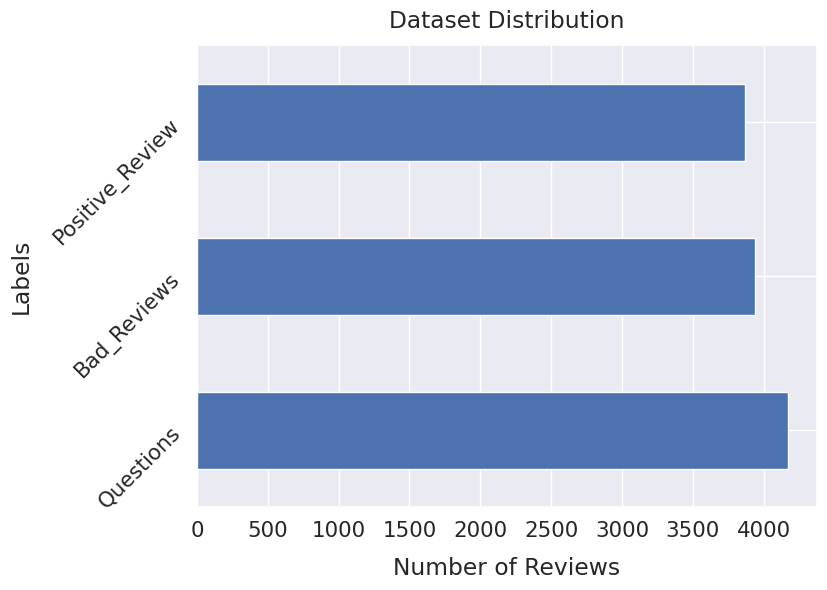

In [10]:
# Plot the Class distribution
sns.set(font_scale=1.4)
comments['Labels'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Reviews", labelpad=12)
plt.ylabel("Labels", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [11]:
comments['Comment_length'] = comments['Comments'].str.len()
print(comments['Comment_length'])

0         30.0
1         35.0
2         88.0
3        223.0
4        205.0
         ...  
11973    340.0
11974    440.0
11975    391.0
11976    152.0
11977    215.0
Name: Comment_length, Length: 11978, dtype: float64


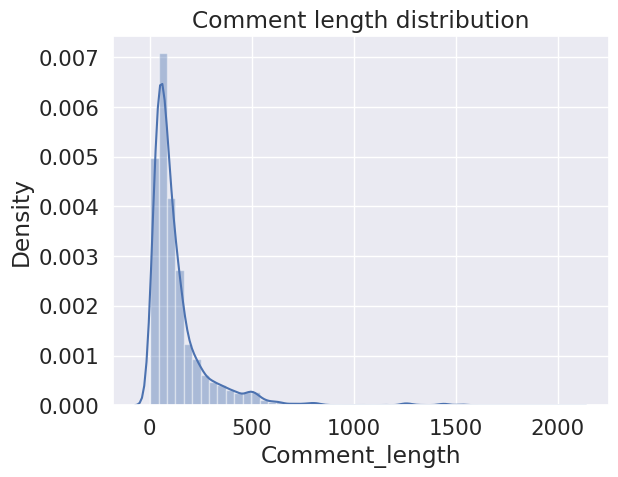

In [12]:
sns.distplot(comments['Comment_length']).set_title('Comment length distribution');

In [13]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [16]:
subset=comments[comments.Labels=="Positive_Review"]
text=subset.Comments.values
words =" ".join(text)
#create_wordcloud(words)

# Preprocessing Steps

In [17]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_documents(articles):
      '''
      This function will clean the news articles by removing punctuation marks and stopwords.

      Args:
      articles: a news text(str)

      returns:
      news: clean text (str)
      '''
      news = articles.replace('\n',' ')
      news = re.sub('[^\u0980-\u09FF]',' ',str(news)) #removing unnecessary punctuation
      # stopwords removal
      stp = open('/content/drive/MyDrive/Thesis Ecommerce/stopwords-bn.txt','r',encoding='utf-8').read().split()
      result = news.split()
      news = [word.strip() for word in result if word not in stp ]
      news =" ".join(news)
      return news

In [18]:
# Apply the function into the dataframe
comments['cleaned'] = comments['Comments'].astype(str).apply(cleaning_documents) 

In [19]:
sample_data = [200,50,600,700,800,900,960,970,1200,1300,1400,1500,1600,1700]
# print some cleaned reviews from the dataset

for i in sample_data:
     print('Original:\n',comments.Comments[i],'\nCleaned:\n',
           comments.cleaned[i],'\n','Sentiment:-- ',comments.Labels[i],'\n')

Original:
 দারাজ থেকে কিনলাম এক জোড়া ২২ টাকা করে। পরে দেখলাম লোকাল দোকানে বিক্রি করে একজোড়া ১০ টাকা করে। অনলাইনে ডাকাতি শুরু করছে। 
Cleaned:
 দারাজ কিনলাম এক জোড়া ২২ টাকা দেখলাম লোকাল দোকানে বিক্রি একজোড়া ১০ টাকা অনলাইনে ডাকাতি 
 Sentiment:--  Bad_Reviews 

Original:
 অক্ষত অবস্থায় সব কিছু পেয়ে অনেক খুশী হয়েছি। অসংখ্য ধন্যবাদ। 
Cleaned:
 অক্ষত অবস্থায় পেয়ে খুশী হয়েছি অসংখ্য ধন্যবাদ 
 Sentiment:--  Positive_Review 

Original:
 ড্রেসটা অনেক বেশি সুন্দর ধন্যবাদ 
Cleaned:
 ড্রেসটা সুন্দর ধন্যবাদ 
 Sentiment:--  Positive_Review 

Original:
 বইটি আপনাদের জীবনের মেন্টর হিসেবে কাজ করবে। আপনাকে আপনার মত করেই শিখাবে জীবনের প্রতিটি মূহূর্তে পরিস্থিতি যেমনই হোক না কেন কীভাবে মাথা উঁচু করে দাঁড়াতে হয়। 
Cleaned:
 বইটি আপনাদের জীবনের মেন্টর হিসেবে আপনাকে মত শিখাবে জীবনের প্রতিটি মূহূর্তে পরিস্থিতি যেমনই কীভাবে মাথা উঁচু দাঁড়াতে 
 Sentiment:--  Positive_Review 

Original:
 মেমোরি কাড ডোকানো জাবে কি 
Cleaned:
 মেমোরি কাড ডোকানো জাবে 
 Sentiment:--  Questions 

Original:
 ভাইয়া এটা কি আপনাদের ওয়েব

# Dataset Summary

In [20]:
def data_summary(dataset):
  '''
  This function will print the summary of the dataset

  Args:
  dataset: cleaned texts

  returns:
  documents: Number of document per class
  words: Number of words per class
  u_words: Number of unique words per class
  class_label: name of the categories
  '''
  documents = []
  words = []
  u_words = []
  #total_u_word = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
  # find class names
  class_label = [k for k,v in dataset.Labels.value_counts().to_dict().items()]
  for label in class_label: 
    word_list = [word.strip().lower() for t in list(comments[comments.Labels==label].cleaned) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
      counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list  
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Documents per class
    documents.append(len(list(comments[comments.Labels==label].cleaned)))
    # Total Word per class
    words.append(len(word_list))
    # Unique words per class 
    u_words.append(len(np.unique(word_list)))
       
    print("\nClass Name : ",label)
    print("Number of Documents:{}".format(len(list(comments[comments.Labels==label].cleaned))))  
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Most Frequent Words:\n")
    for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))
  return documents,words,u_words,class_label

# pass the whole dataset into the function

documents,words,u_words,class_names = data_summary(comments)


Class Name :  Questions
Number of Documents:4169
Number of Words:24718
Number of Unique Words:5700
Most Frequent Words:

ফিট	525
সাথে	416
মডেল	404
ফিল্টার	218
প্রতিস্থাপন	199
ধন্যবাদ	166
কেনমোর	160
আসে	152
দরকার	151
কীভাবে	151

Class Name :  Bad_Reviews
Number of Documents:3938
Number of Words:76835
Number of Unique Words:10922
Most Frequent Words:

খারাপ	1044
ভাল	741
অর্ডার	601
খাবার	600
টুকরো	590
করেছি	510
সবচেয়ে	486
সাথে	448
স্বাদ	421
খাবারের	400

Class Name :  Positive_Review
Number of Documents:3871
Number of Words:51036
Number of Unique Words:8985
Most Frequent Words:

ভাল	901
দুর্দান্ত	790
পছন্দ	767
সাথে	656
সুন্দর	484
ভালো	429
সহজ	351
করেছি	260
বই	259
খাবার	254


# Data Matrix

In [21]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data_matrix

,Total Documents,Total Words,Unique Words,Class Names
0,4169,24718,5700,Questions
1,3938,76835,10922,Bad_Reviews
2,3871,51036,8985,Positive_Review


# Label Encoding

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
comments['Types_target']= label_encoder.fit_transform(comments['Labels']) 

In [23]:
comments.head(100)

,Comments,Labels,Comment_length,cleaned,Types_target
0,ব্লুটুথ দিসে কিন্তু পিন দে নাই,Bad_Reviews,30.0,ব্লুটুথ দিসে পিন দে,0
1,অর্ডার দিতে পাচ্ছি না! একটু দেখবেন!,Bad_Reviews,35.0,অর্ডার পাচ্ছি একটু দেখবেন,0
2,ফোনের সাথে পানির বোতল ফ্রি দেওয়ার কথা ছিলো কিন...,Bad_Reviews,88.0,ফোনের সাথে পানির বোতল ফ্রি দেওয়ার কথা ছিলো দেয়...,0
3,"ফালতু একটা ফোন অতিরিক্ত গরম হয়, ফোনে বেশি চার...",Bad_Reviews,223.0,ফালতু একটা ফোন অতিরিক্ত গরম ফোনে চার্জ মোবাইলে...,0
4,আমি এই ড্রেসটা ওডার করছিলাম কিন্তু\nআমাকে এটা ...,Bad_Reviews,205.0,ড্রেসটা ওডার করছিলাম হয়নি সালোয়ার কামিজের কালা...,0
...,...,...,...,...,...
95,সবচেয়ে ভালো লাগার বিষয় ছিল ... এত দ্রুত ডেলিভা...,Positive_Review,174.0,সবচেয়ে ভালো লাগার বিষয় দ্রুত ডেলিভারি চিন্তাই ...,1
96,যেমন কথা তেমন কাজ মাশাআল্লাহ অসম্ভব সুন্দর হইছ...,Positive_Review,83.0,কথা মাশাআল্লাহ অসম্ভব সুন্দর হইছে ড্রেস টা মেয়...,1
97,আপুর প্রতিটি কাজ অসাধারণ মন ছুয়ে যায় আপনার ও চ...,Positive_Review,68.0,আপুর প্রতিটি অসাধারণ মন ছুয়ে যায় চাইলে অর্ডার,1
98,সুন্দর ব্যবহার ।অনেক অনেক ধন্যবাদ এত সুন্দর শা...,Positive_Review,70.0,সুন্দর ধন্যবাদ সুন্দর শাড়িটা দেয়ার,1


# Split the data in Training and Testing



In [24]:
X_train, X_test, y_train, y_test = train_test_split(comments['cleaned'], 
                                                    comments['Types_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

# Feature Section

In [25]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [26]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


[[0.         0.         0.33787347 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(2396, 300)


Building Models

#Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7925709515859767
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       817
           1       0.77      0.76      0.77       726
           2       0.78      0.87      0.82       853

    accuracy                           0.79      2396
   macro avg       0.79      0.79      0.79      2396
weighted avg       0.79      0.79      0.79      2396



In [28]:
from sklearn.metrics import f1_score
f1=f1_score(labels_test, model_predictions,average='macro')
print('f1_score %.3f' %f1)

f1_score 0.790


In [29]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(labels_test, model_predictions,average='macro')
print('precision %.3f'%precision)

precision 0.794


In [30]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Logistic Regression

In [31]:
model = LogisticRegression(C=1)
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))
clf_report = classification_report(labels_test, model_predictions)

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.7762938230383973
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       817
           1       0.78      0.75      0.76       726
           2       0.77      0.84      0.81       853

    accuracy                           0.78      2396
   macro avg       0.78      0.77      0.77      2396
weighted avg       0.78      0.78      0.78      2396



# Hyper Paramter Tuning (Decision Tree)

In [32]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [33]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}

In [34]:
model = DecisionTreeClassifier(random_state=1,criterion= 'gini', max_depth= None,min_samples_leaf=4)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7141068447412354
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       817
           1       0.67      0.65      0.66       726
           2       0.74      0.79      0.76       853

    accuracy                           0.71      2396
   macro avg       0.71      0.71      0.71      2396
weighted avg       0.71      0.71      0.71      2396



# Svm

In [35]:
# Fitting SVM to the training set
from sklearn.svm import SVC
models = SVC()
models.fit(features_train, labels_train)
model_predictions = models.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8071786310517529
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       817
           1       0.80      0.76      0.78       726
           2       0.78      0.90      0.84       853

    accuracy                           0.81      2396
   macro avg       0.81      0.80      0.80      2396
weighted avg       0.81      0.81      0.81      2396



# Doc2Vec

In [36]:
review = pd.DataFrame()

In [37]:
review['Comments'] = comments['cleaned']

In [38]:

review['Labels'] = comments['Types_target']



In [39]:
review.head()

,Comments,Labels
0,ব্লুটুথ দিসে পিন দে,0
1,অর্ডার পাচ্ছি একটু দেখবেন,0
2,ফোনের সাথে পানির বোতল ফ্রি দেওয়ার কথা ছিলো দেয়...,0
3,ফালতু একটা ফোন অতিরিক্ত গরম ফোনে চার্জ মোবাইলে...,0
4,ড্রেসটা ওডার করছিলাম হয়নি সালোয়ার কামিজের কালা...,0


In [40]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(review.Comments, review.Labels, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [41]:
all_data[0:8]

[TaggedDocument(words=['গুলো', 'মাস্ক', 'ব্যাবহার', 'করছি', 'সেরা', 'মাস্ক', 'স্কয়ারের', 'পন্য', 'ভালোতো', 'হবেই'], tags=['Train_0']),
 TaggedDocument(words=['ভাষাটা', 'কঠিন', 'সাধুভাষা', 'পড়ার', 'অভ্যাস', 'থাকলে', 'শেষ', 'কঠিন', 'দেবী', 'চৌধুরানীর', 'সাথে', 'কিছুটা', 'মিল', 'পেয়েছি', 'স্বামী', 'বিতাড়িত', 'স্ত্রীর', 'স্বামীর', 'সাথে', 'হওয়া', 'স্বামীর', 'চিনতে', 'পারা', 'দেবী', 'চৌধুরানীর', 'সমাপ্তি', 'ভালো', 'হয়েছিল'], tags=['Train_1']),
 TaggedDocument(words=['বিবিকিউ', 'পিজ্জা', 'প্রেম', 'সময়', 'পরিদর্শন', 'করেছি', 'পরিবেশও', 'ভাল'], tags=['Train_2']),
 TaggedDocument(words=['অফারগুলির', 'বৈশিষ্ট্যগুলিতে', 'অ্যাক্সেস', 'ভাল', 'লাগল'], tags=['Train_3']),
 TaggedDocument(words=['ছেলে', 'ট্যাবলেটটির', 'সাথে', 'খেলতে', 'উপভোগ', 'অবশ্যই', 'খেলতে', 'থাকাকালীন', 'নিরাপদে', 'থাকার', 'সেট', 'আপ', 'কিছুটা', 'সময়'], tags=['Train_4']),
 TaggedDocument(words=['পেটাইট', 'আকার', 'কিনেছি', 'একাধিক', 'রঙ', 'সুন্দর', 'প্রসারিত', 'সুন্দর'], tags=['Train_5']),
 TaggedDocument(words=['খারাপ', 'কখনো',

In [42]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=2)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 11978/11978 [00:00<00:00, 1452005.01it/s]


In [43]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# Logistic Regression

In [44]:
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8770172509738453
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1177
           1       0.87      0.86      0.86      1132
           2       0.90      0.92      0.91      1285

    accuracy                           0.88      3594
   macro avg       0.88      0.88      0.88      3594
weighted avg       0.88      0.88      0.88      3594



# RandomForestClassifier

In [45]:
model = RandomForestClassifier(n_estimators=120,criterion='entropy',random_state=0)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8775737340011129
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1177
           1       0.84      0.88      0.86      1132
           2       0.93      0.90      0.91      1285

    accuracy                           0.88      3594
   macro avg       0.88      0.88      0.88      3594
weighted avg       0.88      0.88      0.88      3594



# Fitting SVM

In [46]:
# Fitting SVM to the training set
from sklearn.svm import SVC
model = SVC()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9062326099053979
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1177
           1       0.91      0.90      0.91      1132
           2       0.91      0.94      0.92      1285

    accuracy                           0.91      3594
   macro avg       0.91      0.91      0.91      3594
weighted avg       0.91      0.91      0.91      3594



# DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.7178631051752922
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1177
           1       0.69      0.67      0.68      1132
           2       0.79      0.77      0.78      1285

    accuracy                           0.72      3594
   macro avg       0.72      0.72      0.72      3594
weighted avg       0.72      0.72      0.72      3594

